#### Task i
Use Python tools, such as Pandas, NumPy, and Matplotlib, to read the <br>
dataset, and plot a figure that shows the dependency ratio of Sweden from <br>
1860 to 2022 <br>

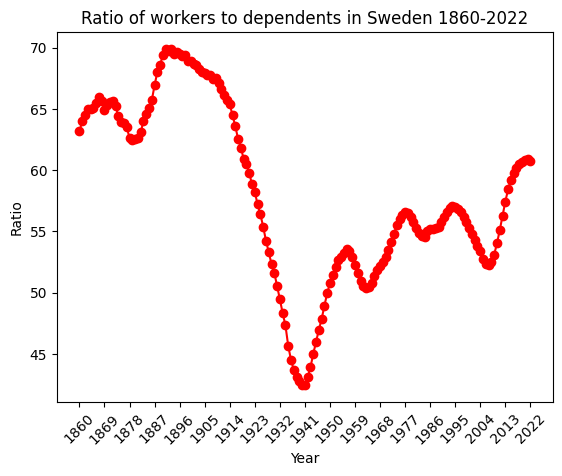

In [49]:
import pandas as pd
import matplotlib.pyplot as plt


raw_df = pd.read_csv('swedish_population_by_year_and_sex_1860-2022.csv')

# Create a list of strings for every dependent age
dependent_ages = [str(i) for i in range(15)]
dependent_ages.extend([str(i) for i in range(65,110)])
dependent_ages.append('110+')
# Create a list of strings for every working age
workers_ages = [str(i) for i in range(15,65)]

# Group and sum by age then sex and rename the axis to type instead of gender
total_work_df = raw_df[raw_df['age'].isin(workers_ages)] \
    .groupby('age').sum() \
    .groupby('sex').sum() \
    .rename_axis('type') \
    .rename(index={'menwomen': 'worker'}) 

total_dep_df = raw_df[raw_df['age'].isin(dependent_ages)] \
    .groupby('age').sum() \
    .groupby('sex').sum() \
    .rename_axis('type') \
    .rename(index={'menwomen': 'depending'})

work_dep_df = pd.concat([total_work_df, total_dep_df]) # Concentrate the two dataframes to make one dataframe for both worker and depending
work_dep_df.loc['ratio'] = round((work_dep_df.loc['depending'] / work_dep_df.loc['worker'])*100,2) # Calculate the ratio of workers to dependents
work_dep_df = work_dep_df.T # Transpose the dataframe to make it easier to plot
work_dep_df.reset_index(inplace=True) #Reset the index to make it easier to plot


# Plot the ratio of workers to dependents
plt.plot(work_dep_df['index'], work_dep_df['ratio'], marker='o', color = 'red', label = 'Ratio of workers to dependents')
plt.title('Ratio of workers to dependents in Sweden 1860-2022')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.xticks(work_dep_df.index[::9], rotation=45) # Show every 9th year
plt.show()


